<a href="https://colab.research.google.com/github/KxxHyoRim/KoreanCow_Suppy_Demand_Prediction/blob/main/Korean_cow_predict_only_price_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/preprocessed_unNormalized_2015_2019.csv'
#pandas read_csv로 불러오기
data = pd.read_csv(filename, encoding='cp949') # encoding : 한글 로딩 위함
data.head()
data.shape

(1235, 16)

In [44]:
# data = data.drop(columns=['도매 가격','소비자 가격', '당해 소비자 가격','날짜'])

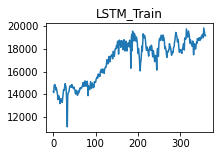

In [45]:
import matplotlib.pyplot as plt

domae = data['당해 도매 가격']

plt.gcf().set_size_inches(3, 2, forward=True)

start = 0
end = -1

real = plt.plot(domae[0:360], label='domae')

plt.title('LSTM_Train')
plt.show()

In [46]:
data_length = len(data['당해 도매 가격'].values)
print("data_length " , data_length)

seq_len = 30
sequence_length = seq_len + 30

result = []
for index in range(data_length - sequence_length):
  result.append(domae[index : index + sequence_length])

len(result)

data_length  1235


1175

In [47]:
normalized_data = []

idx = 0
for window in result: 
  # print('*' * 50)
  # print(window)
  normalized_window = [((float(p) / float(window[idx])) - 1) for p in window]
  normalized_data.append(normalized_window)
  # print(normalized_window)
  idx += 1

result = np.array(normalized_data)

In [48]:
# normalized_data = []

# idx = 0
# for window in result: 
#   normalized_window = [p for p in window]
#   normalized_data.append(normalized_window)
#   # print(normalized_window)
#   idx += 1

# result = np.array(normalized_data)

In [49]:
# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
print(train)
# np.random.shuffle(train)

x_train = train[:, :-30]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -30]
print("x_train", x_train.shape)
print("y_train", y_train.shape)

x_test = result[row:, :-30]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -30]

x_train.shape, x_test.shape



[[ 0.         -0.00680463  0.03528586 ... -0.02469309 -0.01080323
  -0.00266573]
 [ 0.          0.04237887  0.04802938 ... -0.00402599  0.00416726
  -0.00211894]
 [ 0.          0.00542079  0.00684375 ... -0.03665808 -0.04268871
  -0.02601979]
 ...
 [ 0.         -0.09997089 -0.11633188 ...  0.06043668  0.02474527
   0.02660844]
 [ 0.         -0.01817829  0.11922629 ...  0.13856903  0.14063915
   0.13028852]
 [ 0.          0.13994861  0.12696844 ...  0.16175792  0.15121566
   0.1424524 ]]
x_train (1058, 30, 1)
y_train (1058,)


((1058, 30, 1), (117, 30, 1))

In [50]:
"""Build Model"""

model = Sequential()

model.add(LSTM(30, return_sequences=True, input_shape=(30, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 100)


model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=2000,
    callbacks=[early_stopping_callback])

Epoch 1/2000
106/106 [==============================] - 7s 32ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 2/2000
106/106 [==============================] - 3s 24ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 3/2000
106/106 [==============================] - 3s 25ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 4/2000
106/106 [==============================] - 3s 25ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 5/2000
106/106 [==============================] - 3s 24ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 6/2000
106/106 [==============================] - 3s 24ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 7/2000
106/106 [==============================] - 3s 25ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 8/2000
106/106 [==============================] - 3s 25ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 9/2000
106/106 [==============================] - 3s 25ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 10/2000
106/106 [==============================] - 3s 24ms/step - l

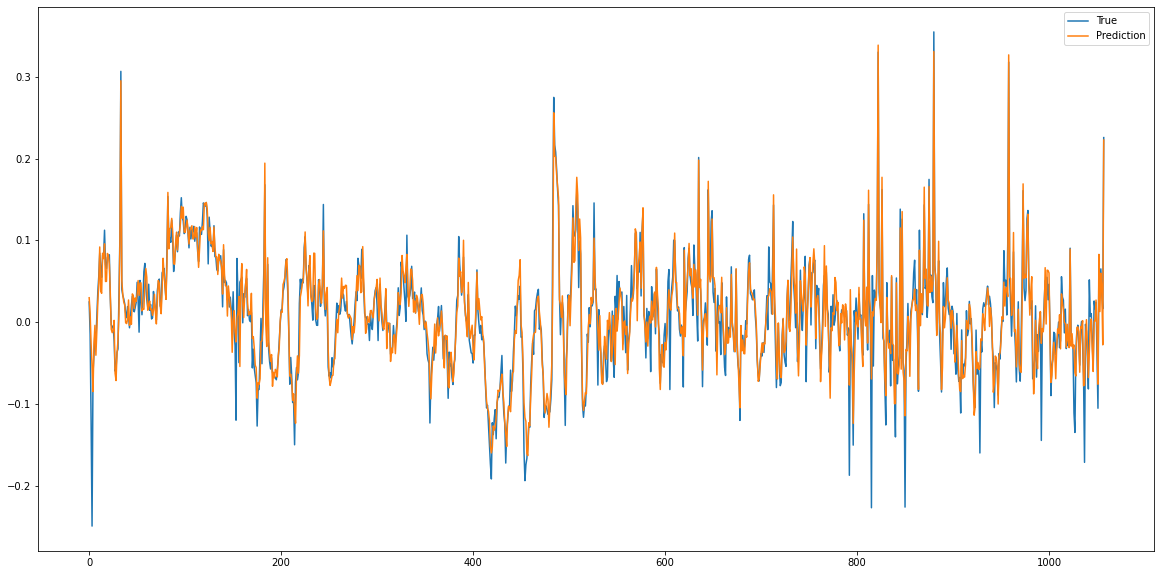

In [52]:
pred = model.predict(x_train)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_train, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

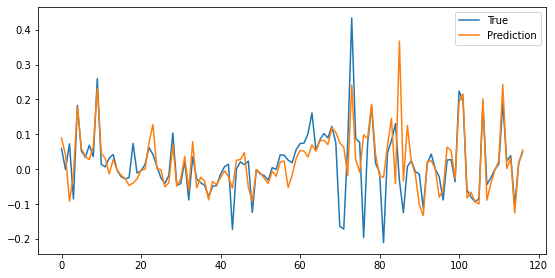

In [53]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()